## Data Preparation

In [1]:
categories = ['negative', 'positive']

In [2]:
data = []
target_names = []

with open("./sentiment labelled sentences/amazon_cells_labelled.txt", encoding="utf-8") as f:
    for line in f:
        (text, answer) = line.split('\t')
        data.append(text)
        target_names.append(int(answer[:-1]))

with open("./sentiment labelled sentences/imdb_labelled.txt", encoding="utf-8") as f:
    for line in f:
        (text, answer) = line.split('\t')
        data.append(text)
        target_names.append(int(answer[:-1]))
        
with open("./sentiment labelled sentences/yelp_labelled.txt", encoding="utf-8") as f:
    for line in f:
        (text, answer) = line.split('\t')
        data.append(text)
        target_names.append(int(answer[:-1]))

dictionary = {}
dictionary['data'] = data
dictionary['target_names'] = target_names

In [3]:
dictionary['data'][0:10]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say, I wasted my money.',
 'What a waste of money and time!.']

In [4]:
dictionary['target_names'][0:10]

[0, 1, 1, 0, 1, 0, 0, 1, 0, 0]

In [5]:
for i in range(10):
    print(categories[dictionary['target_names'][i]])

negative
positive
positive
negative
positive
negative
negative
positive
negative
negative


In [6]:
import pandas as pd
X = pd.DataFrame(data, columns=['text'])
print(len(X))
print(X[0:10])

3000
                                                text
0  So there is no way for me to plug it in here i...
1                        Good case, Excellent value.
2                             Great for the jawbone.
3  Tied to charger for conversations lasting more...
4                                  The mic is great.
5  I have to jiggle the plug to get it to line up...
6  If you have several dozen or several hundred c...
7        If you are Razr owner...you must have this!
8                Needless to say, I wasted my money.
9                   What a waste of money and time!.


In [7]:
X['category'] = target_names

temp_list = []
for i in target_names:
    temp_list.append(categories[target_names[i]])
X['category_name'] = temp_list
X

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
2995,I think food should have flavor and texture an...,0,negative
2996,Appetite instantly gone.,0,negative
2997,Overall I was not impressed and would not go b...,0,negative
2998,"The whole experience was underwhelming, and I ...",0,negative


## Data Mining using Pandas

### Missing Values

In [8]:
X.isnull().sum()

text             0
category         0
category_name    0
dtype: int64

In [9]:
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [10]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [11]:
X.isnull().sum()

text             0
category         0
category_name    1
dtype: int64

In [12]:
X.dropna(inplace=True)

In [13]:
X.isnull().sum()
print(len(X))

3000


### Dealing with Duplicate Data

In [14]:
sum(X.duplicated())

17

In [15]:
# find which ones are duplicated
X[X.duplicated(keep=False)].sort_values("text")

,text,category,category_name
1788,10/10,1,positive
1125,10/10,1,positive
1363,Definitely worth checking out.,1,positive
1090,Definitely worth checking out.,1,positive
748,Does not fit.,0,negative
446,Does not fit.,0,negative
180,Don't buy this product.,0,negative
543,Don't buy this product.,0,negative
402,Excellent product for the price.,1,positive
892,Excellent product for the price.,1,positive


In [16]:
# keep參數，default "First"為第一個之後重複的都刪除
X.drop_duplicates(inplace=True)
X.reset_index(drop=True, inplace=True)

In [17]:
print(sum(X.duplicated()))
print(len(X))

0
2983


## Data Preprocessing

### Sampling

In [18]:
X_sample = X.sample(n=1000) #random state
len(X_sample)

1000

In [19]:
X_sample[0:4]

,text,category,category_name
1228,The poor actors.,0,negative
2780,The classic Maine Lobster Roll was fantastic.,1,positive
2626,This is a good joint.,1,positive
1822,It's very slow.,0,negative


In [20]:
import matplotlib.pyplot as plt

In [21]:
categories

['negative', 'positive']

negative    1493
positive    1490
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

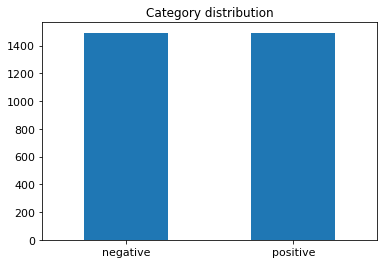

In [22]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',        
                                    rot = 0, fontsize = 11)

negative    506
positive    494
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

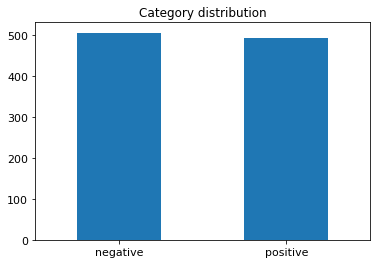

In [23]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',        
                                    rot = 0, fontsize = 11)

### Feature Creation

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
data

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say, I wasted my money.',
 'What a waste of money and time!.',
 'And the sound quality is great.',
 'He was very impressed when going from the original battery to the extended battery.',
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.',
 'Very good quality though',
 'The design is very odd, as the ear "clip" is not very comfortable at all.',
 'Highly recommend for any one who has a blue tooth phone.',
 'I advise EVERYO

In [26]:
token = []
token_in_one_sentence = []
for sentence in list(X['text']):
    for d in nltk.sent_tokenize(sentence, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            token_in_one_sentence.append(word)
    token.append(token_in_one_sentence)
    token_in_one_sentence = []
token[0:5]

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.'],
 ['Good', 'case', ',', 'Excellent', 'value', '.'],
 ['Great', 'for', 'the', 'jawbone', '.'],
 ['Tied',
  'to',
  'charger',
  'for',
  'conversations',
  'lasting',
  'more',
  'than',
  '45',
  'minutes.MAJOR',
  'PROBLEMS',
  '!',
  '!'],
 ['The', 'mic', 'is', 'great', '.']]

In [27]:
X['unigrams'] = token
X

,text,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]"
...,...,...,...,...
2978,I think food should have flavor and texture an...,0,negative,"[I, think, food, should, have, flavor, and, te..."
2979,Appetite instantly gone.,0,negative,"[Appetite, instantly, gone, .]"
2980,Overall I was not impressed and would not go b...,0,negative,"[Overall, I, was, not, impressed, and, would, ..."
2981,"The whole experience was underwhelming, and I ...",0,negative,"[The, whole, experience, was, underwhelming, ,..."


### Feature subset selection

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [32]:
# with default analyzer
analyze = count_vect.build_analyzer()
analyze(X['text'][0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [33]:
X_counts.shape

(2983, 5155)

In [36]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [37]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [40]:
# the "1" in forth document
count_vect.get_feature_names_out()[45]

'45'

In [41]:
# plot heat map
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

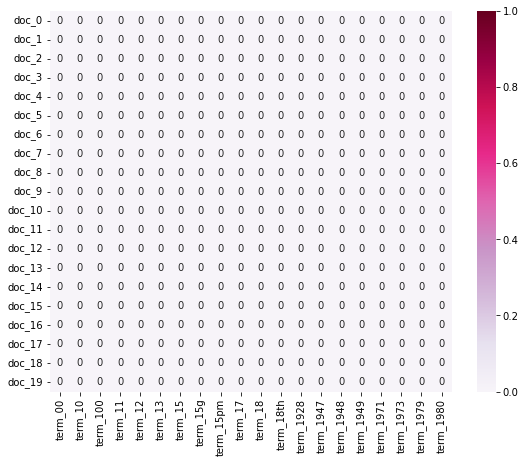

In [45]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimensionality Reduction

In [50]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2983, 2)

In [47]:
categories

['negative', 'positive']

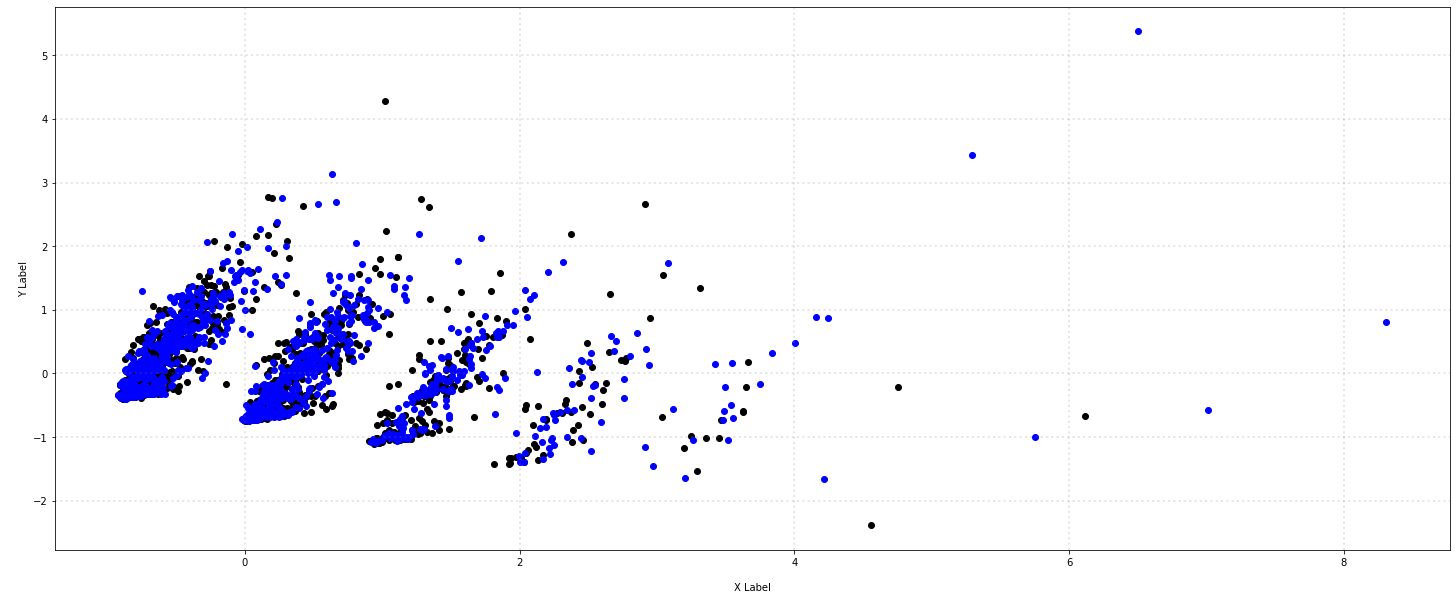

In [48]:
col = ['black', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### Attribute Transformation / Aggregation

In [64]:
import numpy as np

In [65]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

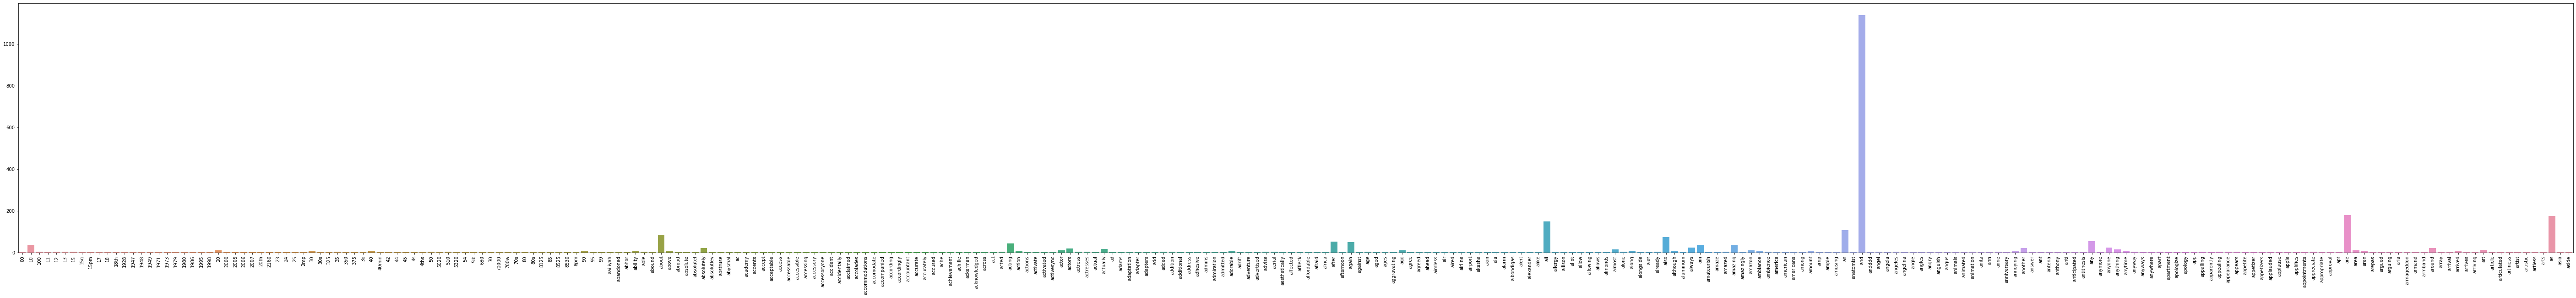

In [66]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

#### __with exercise 15__

In [67]:
# when we are sorting frequencies, indexs need to be swapped too
index = np.argsort(term_frequencies)[::-1]  # [::-1]: reverse
sorted_term_frequencies = np.sort(term_frequencies)[::-1]

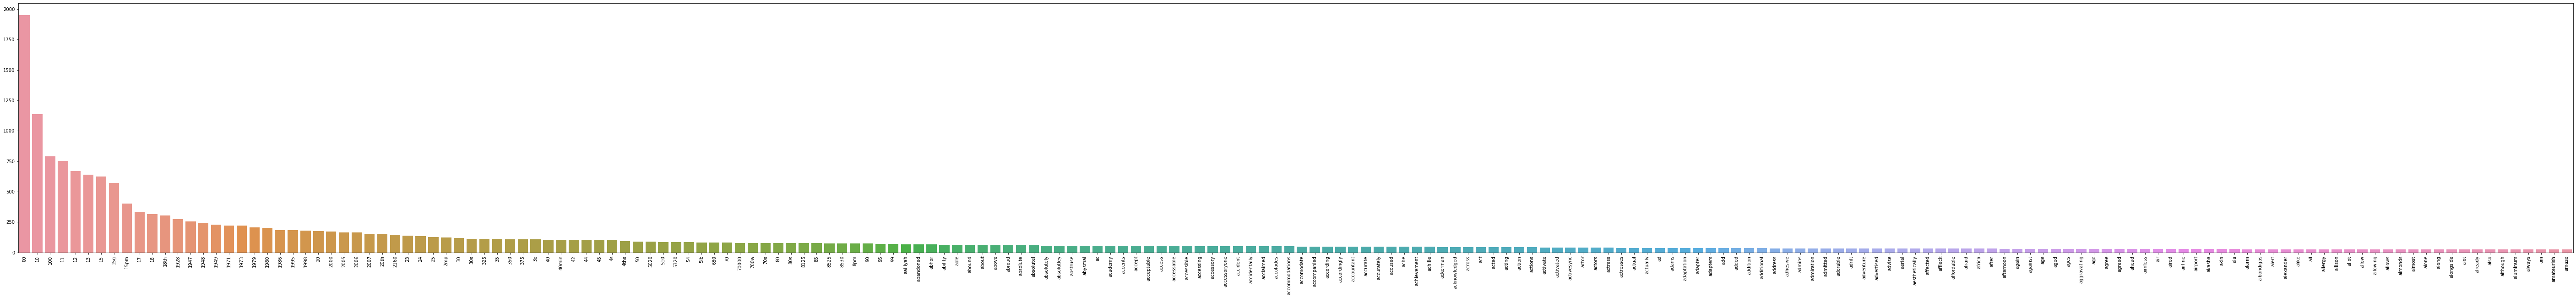

In [68]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[index[:200]], 
            y=sorted_term_frequencies[:200])
g.set_xticklabels(count_vect.get_feature_names_out()[:200], rotation = 90);

In [69]:
# what's the term with the most number
print(count_vect.get_feature_names_out()[index[0]])
print(count_vect.get_feature_names_out()[index[1]])
print(count_vect.get_feature_names_out()[index[2]])

the
and
it


In [70]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

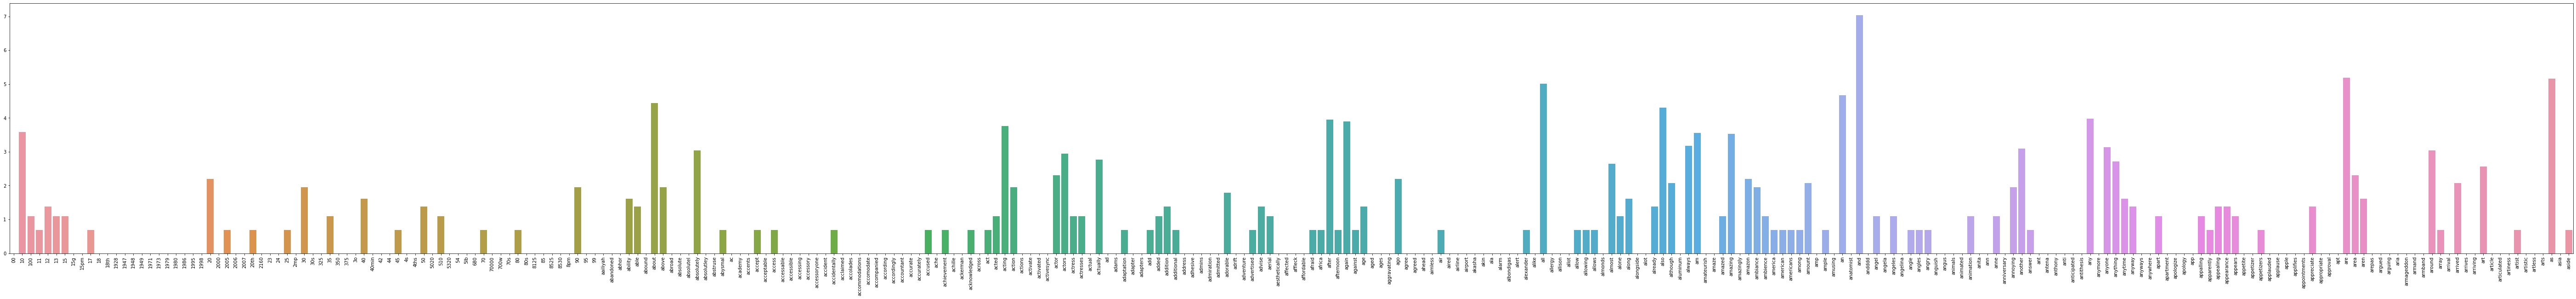

In [71]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### Discretization and Binarization
Although the data itself is already a binary category, it is still worth to try binarization

In [75]:
from sklearn import preprocessing

In [76]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

LabelBinarizer()

In [77]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


The result is not like "[0, 1], [0, 1], [1, 0]......".

I think because it is already a binary category.

## Data Exploration

In [80]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [81]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [82]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [92]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000
